In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import get_data, sample_normal_data, sample_anomaly_data
import pandas as pd
import seaborn as sns
sns.set_style("white")

In [6]:
from utils import SlidingWindowDataset

window_size, target_dims = 20, None
dataset = "ETL"
(train_data, _), (test_data, label) = get_data(dataset, normalize=True)
train_dataset = SlidingWindowDataset(train_data, window_size, target_dims)
test_dataset = SlidingWindowDataset(test_data, window_size, target_dims)
label = label[window_size:] if label is not None else None
model = torch.load(f"./output/{dataset}/VAE_MODEL.pt")
sample_index = np.load(f"./output/{dataset}/sample_index_VAE_MODEL.npy")

load data of: ETL
train:  0 None
test:  0 None
Data normalized
Data normalized
train set shape:  (54361, 12)
test set shape:  (20881, 12)
test set label shape:  (20881,)


In [7]:
from torch.utils.data import SubsetRandomSampler, DataLoader

def get_data_by_index(datasets, index):
    sampler = SubsetRandomSampler(index)
    dataloader = DataLoader(datasets, batch_size=1, sampler=sampler)
    data = []
    for x, y in dataloader:
        data.append(x)
    return data



In [13]:
unsample_index = np.setdiff1d(np.where(label > 0), sample_index)
seen_anomaly_data = get_data_by_index(test_dataset, sample_index)[-20:]
unseen_anomaly_data = get_data_by_index(test_dataset, unsample_index)[-20:]
normal_data = sample_normal_data(test_dataset, 0.1)[:20]

model.eval()
def generate_points(arr):
    x = []
    y = []
    for data in arr:
        data = data.cuda()
        outputs = model(data)
        x.append(torch.pow(outputs[0], 2).mean().item())
        y.append(torch.exp(outputs[1]).mean().item())
    return [x, y]

normal_points = generate_points(normal_data)
seen_anomaly_points = generate_points(seen_anomaly_data)
unseen_anomaly_points = generate_points(unseen_anomaly_data)

df = pd.DataFrame({'x': normal_points[0] + seen_anomaly_points[0] + unseen_anomaly_points[0], 'y': normal_points[1] + seen_anomaly_points[1] + unseen_anomaly_points[1], 'category': ['normal']*20+['seen_anomaly']*20+['unseen_anomaly']*20})


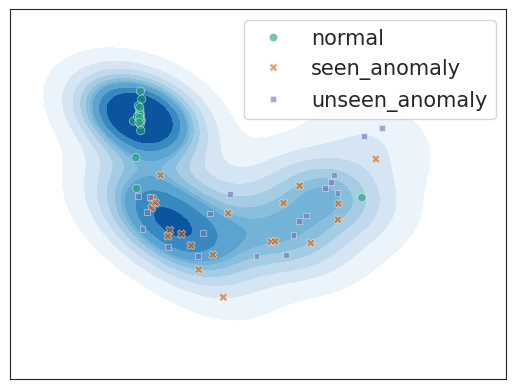

In [21]:
def jitter(values,j=0):
    return values + np.random.normal(j,0.01,values.shape)

x, y = jitter(df.x), jitter(df.y)
sns.kdeplot(x=x, y=y,cmap="Blues", fill=True)
sns.scatterplot(x=x, y=y,hue="category", style="category",palette='Dark2', data=df, alpha=0.6)
# sns.despine()
plt.legend(title=None, fontsize=15)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
# plt.axis('off')

plt.show()

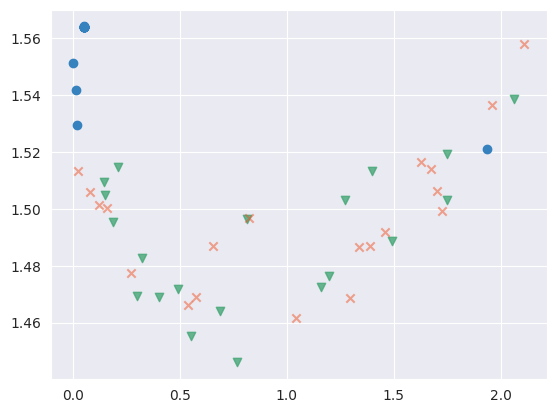

In [16]:
plt.scatter(normal_points[0], normal_points[1], c="#3682be", marker="o")
plt.scatter(seen_anomaly_points[0], seen_anomaly_points[1], c="#45a776", marker="v",alpha=0.8)
plt.scatter(unseen_anomaly_points[0], unseen_anomaly_points[1], c="#f05326", marker="x", alpha=0.5)
plt.show()

<Axes: xlabel='x', ylabel='y'>

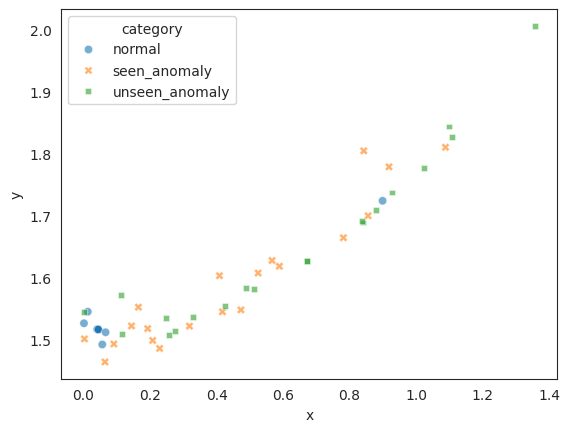

In [12]:
sns.scatterplot(x="x", y="y",hue="category", style="category", data=df, alpha = 3/5)

/tmp/ipykernel_947/308182130.py:1: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.x, y=df.y,cmap="Reds", fill=True, shade_lowest=False)


<Axes: xlabel='x', ylabel='y'>

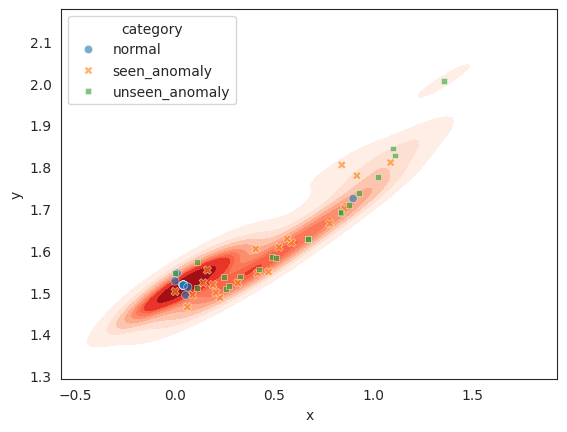

In [14]:
sns.kdeplot(x=df.x, y=df.y,cmap="Reds", fill=True, shade_lowest=False)
sns.scatterplot(x="x", y="y",hue="category", style="category", data=df, alpha = 3/5)
# sns.kdeplot(x=seen_anomaly_points[0], y=seen_anomaly_points[1],cmap="Blues", fill=True, shade_lowest=False)

/tmp/ipykernel_7672/1763310946.py:12: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=setosa.sepal_width, y=setosa.sepal_length,cmap="Reds", fill=True, shade_lowest=False)
/tmp/ipykernel_7672/1763310946.py:14: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=virginica.sepal_width, y=virginica.sepal_length,cmap="Blues", fill=True, shade_lowest=False)


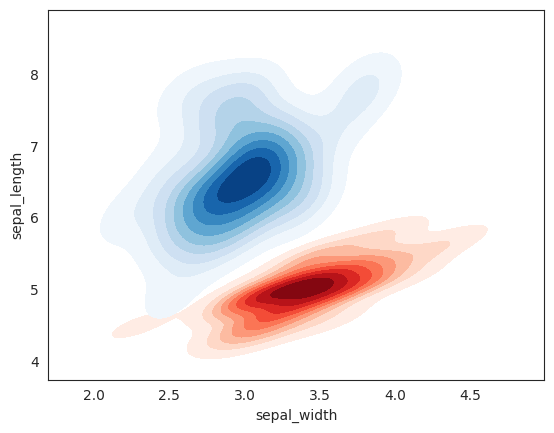

In [23]:
import matplotlib.pyplot as plt
import numpy as np;
import seaborn as sns;
# 获取数据
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
"""
案例7：
绘制多个阴影双变量密度图(这里绘制两个)
"""
sns.kdeplot(x=setosa.sepal_width, y=setosa.sepal_length,cmap="Reds", fill=True, shade_lowest=False)

sns.kdeplot(x=virginica.sepal_width, y=virginica.sepal_length,cmap="Blues", fill=True, shade_lowest=False)
plt.show()